<a href="https://colab.research.google.com/github/rhl555/LoLDataAnalysis/blob/main/LoL_Classification_Model_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**League of Legends Classification Model Project** 

By: Rahul Nathan

# Motivation for the Project

While playing League of Legends for over 8 years, I have had several moments of frustrations from the dreadful losing streaks. I realized that if I could properly analyze my statistics for each game, I would be able to improve my performance. It is inevitable to lose games since other teammates might play poorly or the team as a whole might make bad decisions during crucial moments. Despite the uncontrollable variables I might face during a game, I am planning on doing my best to minimize those defeats so I can continue to win more games and climb up the ranks. 

# Initial Hypothesis and Questions to Answer

Since I have been playing the game for a long time, I am relatively familiar with certain factors that tend to influence the outcome of the game.  

My initial hypothesis is listed below:

*   Achieving objectives such as towers, dragons, barons, rifts, and inhibs would result in a win. Therefore, the team with the most objectives should win the game. 


Some that I hope to answer by the end of this project are listed below:

1. Do objectives achieved early in the game have a substantial effect on the outcome?
2. Does late game performance matter more than early game performance?
3. What factors other than objectives contribute to the outcome of a game?
4. Should I change roles or play new champions?
5. As a Jungle main, are there certain aspects of my gameplay I should focus on?

# Import Libraries

In [ ]:
pip install pca

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as px
from pca import pca
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Import Raw Data and Create Data Frame

In [ ]:
url = 'https://raw.githubusercontent.com/rhl555/LoLDataAnalysis/main/lol_raw_data.csv'
df=pd.read_csv(url)
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Username,Champ Name,Position,Kills,Deaths,Assists,Neutral Minions Killed,Game Length,Gold Earned,Jungle CS Under 10 Min,...,Dragon Kills,First Inhib,Inhib Kills,First Rift,Herald Kills,First Tower,Tower Kills,Damage Taken,Damage Shielded,Win
0,ItadoriYuujii,Volibear,JUNGLE,3,6,7,139,2154,11484,60.0,...,1,False,0,True,1,False,3,31860,0,False
1,ItadoriYuujii,Volibear,JUNGLE,9,2,5,134,1761,12375,55.5,...,4,True,2,True,2,True,9,26266,0,True
2,ItadoriYuujii,Volibear,JUNGLE,2,5,8,112,1612,8297,53.0,...,1,False,0,False,0,False,2,21492,0,False
3,ItadoriYuujii,Volibear,JUNGLE,6,1,13,116,1609,10494,56.0,...,2,True,3,True,2,True,10,26476,0,True
4,ItadoriYuujii,Volibear,JUNGLE,3,1,6,105,1090,6885,60.0,...,2,False,0,True,1,True,3,12640,0,True


**Comments:**

The raw data was collected by using Riot Game's API. The code for this is located in the file get_matches.py: (https://github.com/rhl555/LoLDataAnalysis/blob/main/get_matches.py) 

# Data Cleaning

**Primary Statistics of the Data**

In [ ]:
df[df['Win']==True].describe()

,Kills,Deaths,Assists,Neutral Minions Killed,Game Length,Gold Earned,Jungle CS Under 10 Min,Lane Minions Under 10 Min,Skillshots Dodged,Skillshots Hit,...,Damage Dealt,Total Minions Killed,Baron Kills,Team Kills,Dragon Kills,Inhib Kills,Herald Kills,Tower Kills,Damage Taken,Damage Shielded
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,132.000000,132.000000,132.000000,132.000000,...,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,6.455939,3.800766,10.340996,92.325670,1726.252874,12032.896552,53.167803,5.106061,47.643939,32.772727,...,156605.459770,75.942529,0.858238,35.352490,2.984674,1.789272,0.965517,8.551724,22987.570881,97.222222
std,3.925627,2.475759,5.365363,66.521001,431.279694,3349.018629,12.109977,13.519710,47.875017,25.724789,...,66207.993718,70.568628,0.661452,10.475167,1.084752,1.155938,0.719748,2.378228,11268.600273,361.704815
min,0.000000,0.000000,0.000000,0.000000,192.000000,1127.000000,0.000000,0.000000,0.000000,0.000000,...,5050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,317.000000,0.000000
25%,3.000000,2.000000,7.000000,12.000000,1485.000000,9977.000000,50.250000,1.000000,16.000000,16.000000,...,114530.000000,24.000000,0.000000,29.000000,2.000000,1.000000,0.000000,7.000000,15845.000000,0.000000
50%,6.000000,3.000000,10.000000,117.000000,1728.000000,11784.000000,55.750000,2.000000,36.000000,25.500000,...,154222.000000,43.000000,1.000000,36.000000,3.000000,2.000000,1.000000,9.000000,20939.000000,0.000000
75%,9.000000,5.000000,13.000000,147.000000,1992.000000,14406.000000,60.000000,4.250000,57.500000,40.000000,...,196487.000000,131.000000,1.000000,42.000000,4.000000,3.000000,1.000000,10.000000,29488.000000,0.000000
max,21.000000,13.000000,29.000000,222.000000,2841.000000,22355.000000,72.000000,87.000000,294.000000,153.000000,...,402547.000000,364.000000,2.000000,61.000000,6.000000,6.000000,2.000000,11.000000,66682.000000,2464.000000


In [ ]:
df[df['Win']==False].describe()

,Kills,Deaths,Assists,Neutral Minions Killed,Game Length,Gold Earned,Jungle CS Under 10 Min,Lane Minions Under 10 Min,Skillshots Dodged,Skillshots Hit,...,Damage Dealt,Total Minions Killed,Baron Kills,Team Kills,Dragon Kills,Inhib Kills,Herald Kills,Tower Kills,Damage Taken,Damage Shielded
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,116.000000,116.000000,116.000000,116.000000,...,239.000000,239.00000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,4.656904,5.945607,7.255230,76.108787,1787.899582,10513.682008,50.682759,4.577586,70.034483,42.034483,...,134497.627615,79.25523,0.125523,23.460251,1.317992,0.167364,0.523013,2.790795,24929.828452,87.686192
std,3.282156,2.247588,4.278847,57.493630,372.052684,3067.998385,10.865700,9.201277,65.130495,31.018068,...,60088.750533,71.00306,0.368019,10.565397,1.099719,0.515741,0.646982,2.258076,10710.900161,313.430125
min,0.000000,0.000000,0.000000,0.000000,198.000000,1057.000000,0.000000,0.000000,4.000000,3.000000,...,3774.000000,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,209.000000,0.000000
25%,2.500000,4.000000,4.000000,6.000000,1537.500000,8384.500000,46.187500,1.000000,28.750000,20.000000,...,94524.500000,29.00000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,17444.000000,0.000000
50%,4.000000,6.000000,7.000000,92.000000,1774.000000,10098.000000,52.000000,2.000000,50.500000,34.000000,...,130333.000000,44.00000,0.000000,22.000000,1.000000,0.000000,0.000000,3.000000,23517.000000,0.000000
75%,6.000000,7.000000,10.000000,122.000000,2050.500000,12459.500000,56.000000,4.250000,82.250000,53.000000,...,164681.000000,128.00000,0.000000,30.000000,2.000000,0.000000,1.000000,4.000000,30802.000000,0.000000
max,25.000000,14.000000,19.000000,196.000000,2734.000000,19769.000000,68.000000,67.000000,425.000000,192.000000,...,327518.000000,297.00000,2.000000,57.000000,4.000000,3.000000,2.000000,11.000000,67065.000000,2291.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Username                   500 non-null    object 
 1   Champ Name                 500 non-null    object 
 2   Position                   500 non-null    object 
 3   Kills                      500 non-null    int64  
 4   Deaths                     500 non-null    int64  
 5   Assists                    500 non-null    int64  
 6   Neutral Minions Killed     500 non-null    int64  
 7   Game Length                500 non-null    int64  
 8   Gold Earned                500 non-null    int64  
 9   Jungle CS Under 10 Min     248 non-null    float64
 10  Lane Minions Under 10 Min  248 non-null    float64
 11  Skillshots Dodged          248 non-null    float64
 12  Skillshots Hit             248 non-null    float64
 13  Solo Kills                 248 non-null    float64

**Add Relevant Columns to the Data Frame**

In [ ]:
# Normalize kills, deaths, assists, gold earned, skillshots dodged, skillshots hit, 
# vision score, damage dealt, team kills, damage taken, and damage shielded
df['Game Length Minutes'] = df['Game Length']/60
df['Kills Per Minute'] = df['Kills']/df['Game Length Minutes']
df['Deaths Per Minute'] = df['Deaths']/df['Game Length Minutes']
df['Assists Per Minute'] = df['Assists']/df['Game Length Minutes']
df['Gold Earned Per Minute'] = df['Gold Earned']/df['Game Length Minutes']
df['Skillshots Dodged Per Minute'] = df['Skillshots Dodged']/df['Game Length Minutes']
df['Skillshots Hit Per Minute'] = df['Skillshots Hit']/df['Game Length Minutes']
df['Vision Score Per Minute'] = df['Vision Score']/df['Game Length Minutes']
df['Damage Dealt Per Minute'] = df['Damage Dealt']/df['Game Length Minutes']
df['Team Kills Per Minute'] = df['Team Kills']/df['Game Length Minutes']
df['Damage Taken Per Minute'] = df['Damage Taken']/df['Game Length Minutes']
df['Damage Shielded Per Minute'] = df['Damage Shielded']/df['Game Length Minutes']

#calculate total minions killed per minute (jungle + neutral)
df['Player CS Per Minute'] = (df['Neutral Minions Killed'] + df['Total Minions Killed'])/df['Game Length Minutes']

df.head()

,Username,Champ Name,Position,Kills,Deaths,Assists,Neutral Minions Killed,Game Length,Gold Earned,Jungle CS Under 10 Min,...,Assists Per Minute,Gold Earned Per Minute,Skillshots Dodged Per Minute,Skillshots Hit Per Minute,Vision Score Per Minute,Damage Dealt Per Minute,Team Kills Per Minute,Damage Taken Per Minute,Damage Shielded Per Minute,Player CS Per Minute
0,ItadoriYuujii,Volibear,JUNGLE,3,6,7,139,2154,11484,60.0,...,0.194986,319.888579,0.724234,1.420613,0.529248,5487.437326,0.779944,887.465181,0.0,5.487465
1,ItadoriYuujii,Volibear,JUNGLE,9,2,5,134,1761,12375,55.5,...,0.170358,421.635434,0.817717,0.885860,1.294719,5523.952300,1.124361,894.923339,0.0,5.621806
2,ItadoriYuujii,Volibear,JUNGLE,2,5,8,112,1612,8297,53.0,...,0.297767,308.821340,0.781638,0.856079,0.744417,4477.258065,1.079404,799.950372,0.0,4.913151
3,ItadoriYuujii,Volibear,JUNGLE,6,1,13,116,1609,10494,56.0,...,0.484773,391.323804,1.566190,2.013673,0.820385,5027.284027,1.603480,987.296457,0.0,5.071473
4,ItadoriYuujii,Volibear,JUNGLE,3,1,6,105,1090,6885,60.0,...,0.330275,378.990826,0.385321,0.605505,1.100917,4622.146789,0.880734,695.779817,0.0,6.110092


**Adjust Invalid Entries**

In [ ]:
#adjust invalid entries for position
df['Position'].value_counts()
df.drop(df[df['Position']=='Invalid'].index,axis=0,inplace=True)

# Exploratory Data Analysis (EDA)

**Split Data into Numerical and Categorical**

In [ ]:
numeric = ['Kills Per Minute','Deaths Per Minute','Assists Per Minute','Player CS Per Minute',
             'Game Length Minutes','Gold Earned Per Minute','Jungle CS Under 10 Min',
             'Lane Minions Under 10 Min','Skillshots Dodged Per Minute',
             'Skillshots Hit Per Minute','Vision Score Per Minute','Damage Dealt Per Minute',
             'Team Kills Per Minute','Damage Taken Per Minute','Damage Shielded Per Minute']
df_num = df[numeric]

categorical = ['Champ Name','Position','Solo Kills','First Baron','Baron Kills','First Blood',
            'First Drag','Dragon Kills','First Inhib','Inhib Kills','First Rift',
            'Herald Kills','First Tower','Tower Kills','Win']
df_cat = df[categorical]

**Probability Density Functions for Numeric Features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

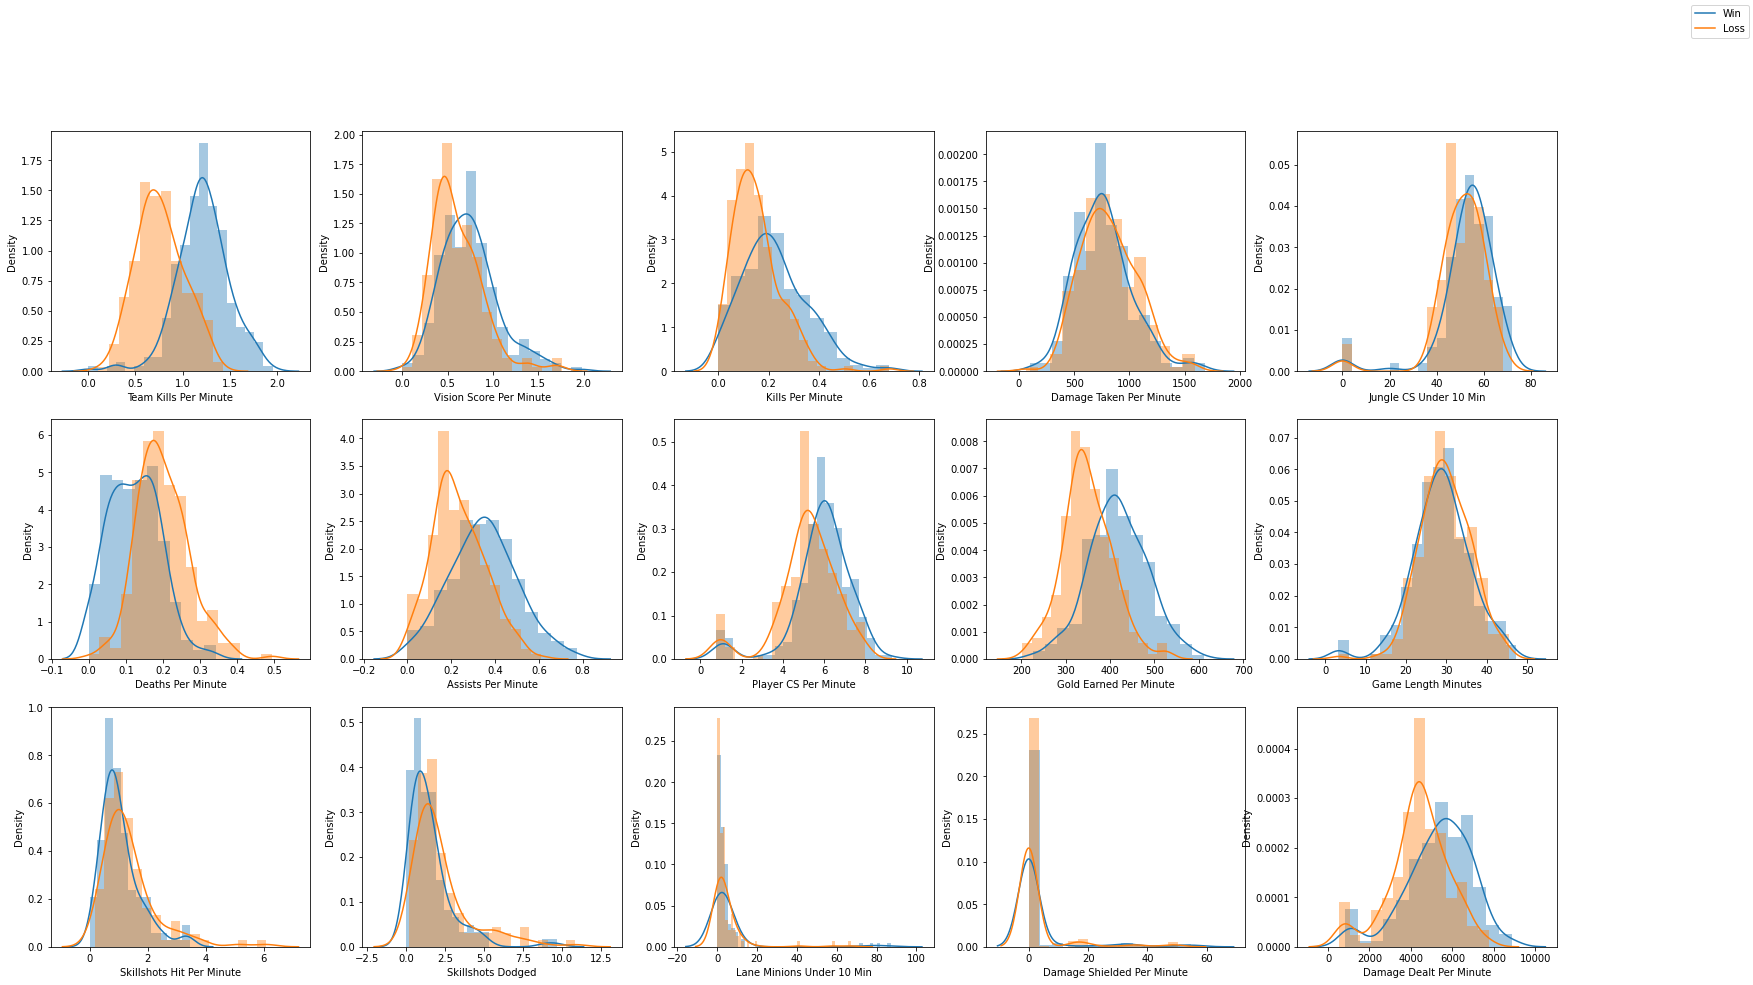

In [ ]:
fig,axes = plt.subplots(3,5,figsize=(27,15))
win_list = df.loc[df['Win'] == True]
loss_list = df.loc[df['Win'] == False]
sns.distplot(win_list[['Team Kills Per Minute']], ax=axes[0,0]).set(xlabel = 'Team Kills Per Minute')
sns.distplot(loss_list[['Team Kills Per Minute']], ax=axes[0,0])
sns.distplot(win_list[['Vision Score Per Minute']], ax=axes[0,1]).set(xlabel = 'Vision Score Per Minute')
sns.distplot(loss_list[['Vision Score Per Minute']], ax=axes[0,1])
sns.distplot(win_list[['Kills Per Minute']], ax=axes[0,2]).set(xlabel = 'Kills Per Minute')
sns.distplot(loss_list[['Kills Per Minute']], ax=axes[0,2])
sns.distplot(win_list[['Damage Taken Per Minute']], ax=axes[0,3]).set(xlabel = 'Damage Taken Per Minute')
sns.distplot(loss_list[['Damage Taken Per Minute']], ax=axes[0,3])
sns.distplot(win_list[['Jungle CS Under 10 Min']], ax=axes[0,4]).set(xlabel = 'Jungle CS Under 10 Min')
sns.distplot(loss_list[['Jungle CS Under 10 Min']], ax=axes[0,4])

sns.distplot(win_list[['Deaths Per Minute']], ax=axes[1,0]).set(xlabel = 'Deaths Per Minute')
sns.distplot(loss_list[['Deaths Per Minute']], ax=axes[1,0])
sns.distplot(win_list[['Assists Per Minute']], ax=axes[1,1]).set(xlabel = 'Assists Per Minute')
sns.distplot(loss_list[['Assists Per Minute']], ax=axes[1,1])
sns.distplot(win_list[['Player CS Per Minute']], ax=axes[1,2]).set(xlabel = 'Player CS Per Minute')
sns.distplot(loss_list[['Player CS Per Minute']], ax=axes[1,2])
sns.distplot(win_list[['Gold Earned Per Minute']], ax=axes[1,3]).set(xlabel = 'Gold Earned Per Minute')
sns.distplot(loss_list[['Gold Earned Per Minute']], ax=axes[1,3])
sns.distplot(win_list[['Game Length Minutes']], ax=axes[1,4]).set(xlabel = 'Game Length Minutes')
sns.distplot(loss_list[['Game Length Minutes']], ax=axes[1,4])

sns.distplot(win_list[['Skillshots Hit Per Minute']], ax=axes[2,0]).set(xlabel = 'Skillshots Hit Per Minute')
sns.distplot(loss_list[['Skillshots Hit Per Minute']], ax=axes[2,0])
sns.distplot(win_list[['Skillshots Dodged Per Minute']], ax=axes[2,1]).set(xlabel = 'Skillshots Dodged')
sns.distplot(loss_list[['Skillshots Dodged Per Minute']], ax=axes[2,1])
sns.distplot(win_list[['Lane Minions Under 10 Min']], ax=axes[2,2]).set(xlabel = 'Lane Minions Under 10 Min')
sns.distplot(loss_list[['Lane Minions Under 10 Min']], ax=axes[2,2])
sns.distplot(win_list[['Damage Shielded Per Minute']], ax=axes[2,3]).set(xlabel = 'Damage Shielded Per Minute')
sns.distplot(loss_list[['Damage Shielded Per Minute']], ax=axes[2,3])
sns.distplot(win_list[['Damage Dealt Per Minute']], ax=axes[2,4]).set(xlabel = 'Damage Dealt Per Minute')
sns.distplot(loss_list[['Damage Dealt Per Minute']], ax=axes[2,4])

fig.legend(['Win','Loss'])
#fig.y_label('Density')
#sns.distplot(df['Team Kills Per Minute'],ax=axes[0,0])
#g.map(sns.distplot,'Team Kills Per Minute').add_legend()


**Comments:**

In order to visualize the numerical data, multiple distplots were created. A majority of the results were expected such as more games that are won have higher *Team Kills*, *Vision Score Per Minute*, *Assists Per Minute*, etc. On the other hand, some results were not expected such as more games that are lost have *Higher Skillshots Dodged Per Minute* and *Skillshots Hit Per Minute*, and an equivalent amount of *Damage Shielded Per Minute* and *Damage Taken Per Minute*.   

**Heat Map for Numeric Features**

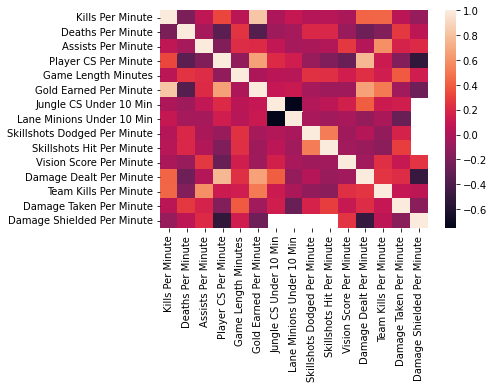

In [ ]:
sns.heatmap(df_num.corr())

**Comments:** 

The heat map was useful to visualize the correlations between two variables. By analyzing the graph above, the darker cells have a more negative correlation and the lighter cells have a more positive correlation. Some positive trends that were noted were *Gold Earned Per Minute* and *Kills Per Minute*, *Player CS Per Minute* and *Damage Dealt Per Minute*, *Team Kills Per Minute* and *Assists Per Minute*, etc. Some negative trends were *Gold Earned Per Minute* and *Deaths Per Minute*, *Lane Minions Under 10 Min* and *Jungle CS Under 10 Min*, *Damage Shielded Per Minute* and *Player CS Per Minute*, etc.  

**Countplots for Categorical Features**

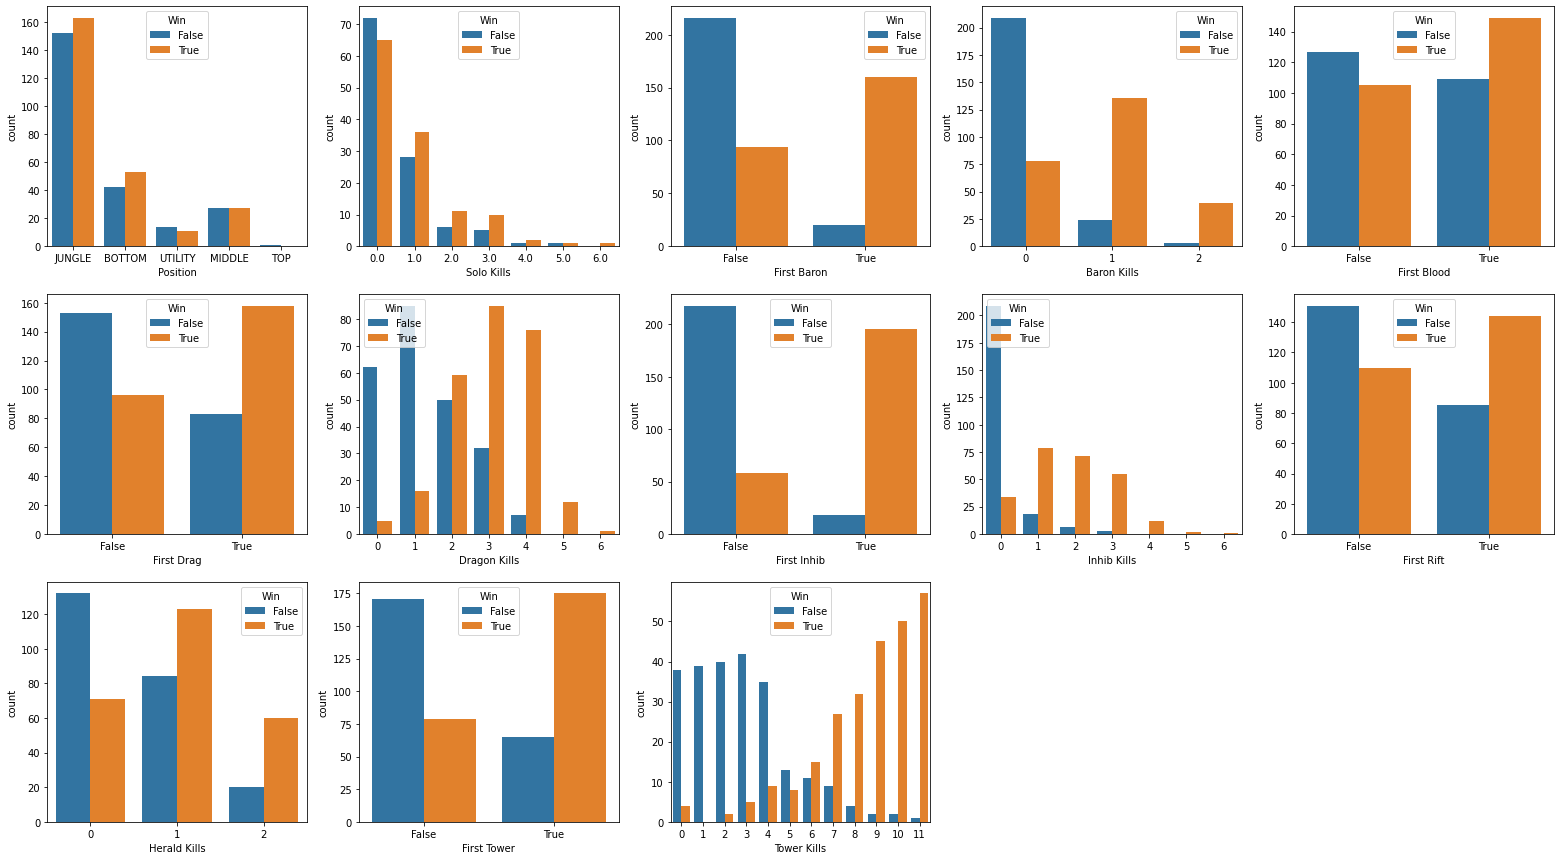

In [ ]:
fig,axes = plt.subplots(3,5,figsize=(27,15))

sns.countplot(data=df, x='Position',ax=axes[0,0],hue='Win').set(xlabel='Position')
sns.countplot(data=df, x='Solo Kills',ax=axes[0,1],hue='Win').set(xlabel='Solo Kills')
sns.countplot(data=df, x='First Baron',ax=axes[0,2],hue='Win').set(xlabel='First Baron')
sns.countplot(data=df, x='Baron Kills',ax=axes[0,3],hue='Win').set(xlabel='Baron Kills')
sns.countplot(data=df, x='First Blood',ax=axes[0,4],hue='Win').set(xlabel='First Blood')

sns.countplot(data=df, x='First Drag',ax=axes[1,0],hue='Win').set(xlabel='First Drag')
sns.countplot(data=df, x='Dragon Kills',ax=axes[1,1],hue='Win').set(xlabel='Dragon Kills')
sns.countplot(data=df, x='First Inhib',ax=axes[1,2],hue='Win').set(xlabel='First Inhib')
sns.countplot(data=df, x='Inhib Kills',ax=axes[1,3],hue='Win').set(xlabel='Inhib Kills')
sns.countplot(data=df, x='First Rift',ax=axes[1,4],hue='Win').set(xlabel='First Rift')

sns.countplot(data=df, x='Herald Kills',ax=axes[2,0],hue='Win').set(xlabel='Herald Kills')
sns.countplot(data=df, x='First Tower',ax=axes[2,1],hue='Win').set(xlabel='First Tower')
sns.countplot(data=df, x='Tower Kills',ax=axes[2,2],hue='Win').set(xlabel='Tower Kills')

fig.delaxes(ax=axes[2,3])
fig.delaxes(ax=axes[2,4])



**Comments:** 

In the plots above, there were several interesting trends. If a team got *First Blood*, *First Baron*, *First Inhib*, *First Drag*, *First Rift*, or *First Tower*, they would have an increased chance of winning. For the features *First Blood* and *First Rift*, the increase in the chance of winning is not that substantial due to the fact that these objectives are acquired early in the game. Meanwhile, certain objectives that are usually achieved early in the game such as *First Tower* and *First Drag*, have a much higher chance of winning the game compared to other early objectives. Therefore, it can be concluded that teams should focus more on getting *First Tower* or *First Drag* compared to other early objectives. 

As an overview, the general trend of achieving more objectives as dragons, heralds, towers, inhibitors, and barons will result in games won. 

**Pivot Table for Champ Name**

In [ ]:
pd.pivot_table(df,index='Win',columns='Champ Name',values='Position',aggfunc='count')


Champ Name,Ahri,Amumu,Annie,Blitzcrank,Brand,Caitlyn,Diana,Ekko,Fizz,Graves,...,Pyke,Sylas,Syndra,Trundle,Veigar,Vi,Viego,Volibear,XinZhao,Zac
Win,,,,,,,,,,,,,,,,,,,,,
False,1.0,1.0,11.0,4.0,NaN,31.0,65.0,3.0,NaN,2.0,...,1.0,2.0,1.0,36.0,11.0,7.0,2.0,27.0,1.0,1.0
True,2.0,NaN,12.0,3.0,1.0,28.0,76.0,2.0,1.0,2.0,...,NaN,NaN,NaN,24.0,10.0,9.0,NaN,40.0,1.0,NaN


**Average Gold Per Minute for Each Role**

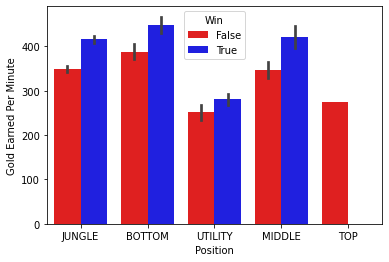

In [ ]:
sns.barplot(data=df,x='Position',y='Gold Earned Per Minute',hue='Win',palette=('Red','Blue'))

**Comments:**

By analyzing the graph above, the Bottom role led to the most gold earned per minute out of all the games won. This conclusion is also the same for the all the games lost. Therefore it can be concluded that the type of role played has an effect on how much gold is earned during that game.  

**Games Won and Lost for Each Role**

In [ ]:
pd.pivot_table(df, index='Win',columns='Position',values='Champ Name',aggfunc='count')

Position,BOTTOM,JUNGLE,MIDDLE,TOP,UTILITY
Win,,,,,
False,42.0,152.0,27.0,1.0,14.0
True,53.0,163.0,27.0,NaN,11.0


**Comments:**

In the pivot table above, the Bottom role also has a higher win rate compared to the other roles. Even though the Jungle role has a slightly lower win rate than the Bottom role, it also has more than triple the amount of games played.  

**Game Length vs. Dragons Killed** 

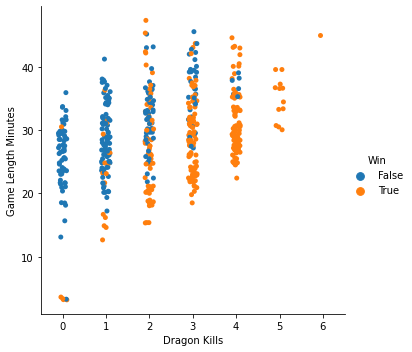

In [ ]:
sns.catplot(data=df,x='Dragon Kills',y='Game Length Minutes', hue='Win')

**Comments:**

In the catplot shown, a change can be noticed between the games won and lost at 2 dragon kills. Once a team kills more than 2 dragons, they seem to have more of a chance to win the game. Therefore, it can be concluded that the objectives on the map are an important part of the game. 

**Game Length vs. Barons Killed**

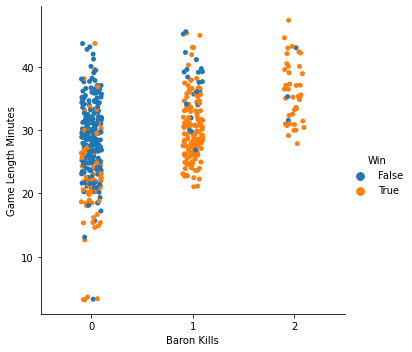

In [ ]:
sns.catplot(data=df,x='Baron Kills',y='Game Length Minutes', hue='Win')

**Comments:**

Similar to the catplot for Game Length vs. Dragons Killed, a drastic change can be seen from 0 to 1 barons killed. After a team has killed a baron, they have a significantly higher chance of winning the game. 

**Average Damage Dealt Per Minute for Each Role**

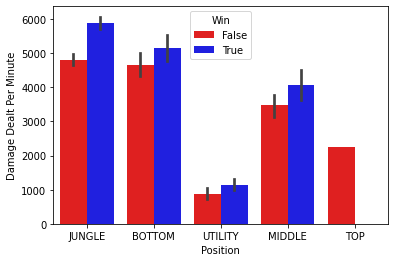

In [ ]:
sns.barplot(data=df,x='Position',y='Damage Dealt Per Minute',hue='Win',palette=('Red','Blue'))

**Comments:**

Since previous results stated that the Bottom role has the most amount of *Gold Earned Per Minute*, it was expected to see that this role also had the most amount of *Damage Dealt Per Minute*. By analyzing the plot above, this was not the case. The Jungle role has the most amount of damage dealt most likely due to the champions that were played. 

**Average Damage Dealt Per Minute vs. Champ Name**

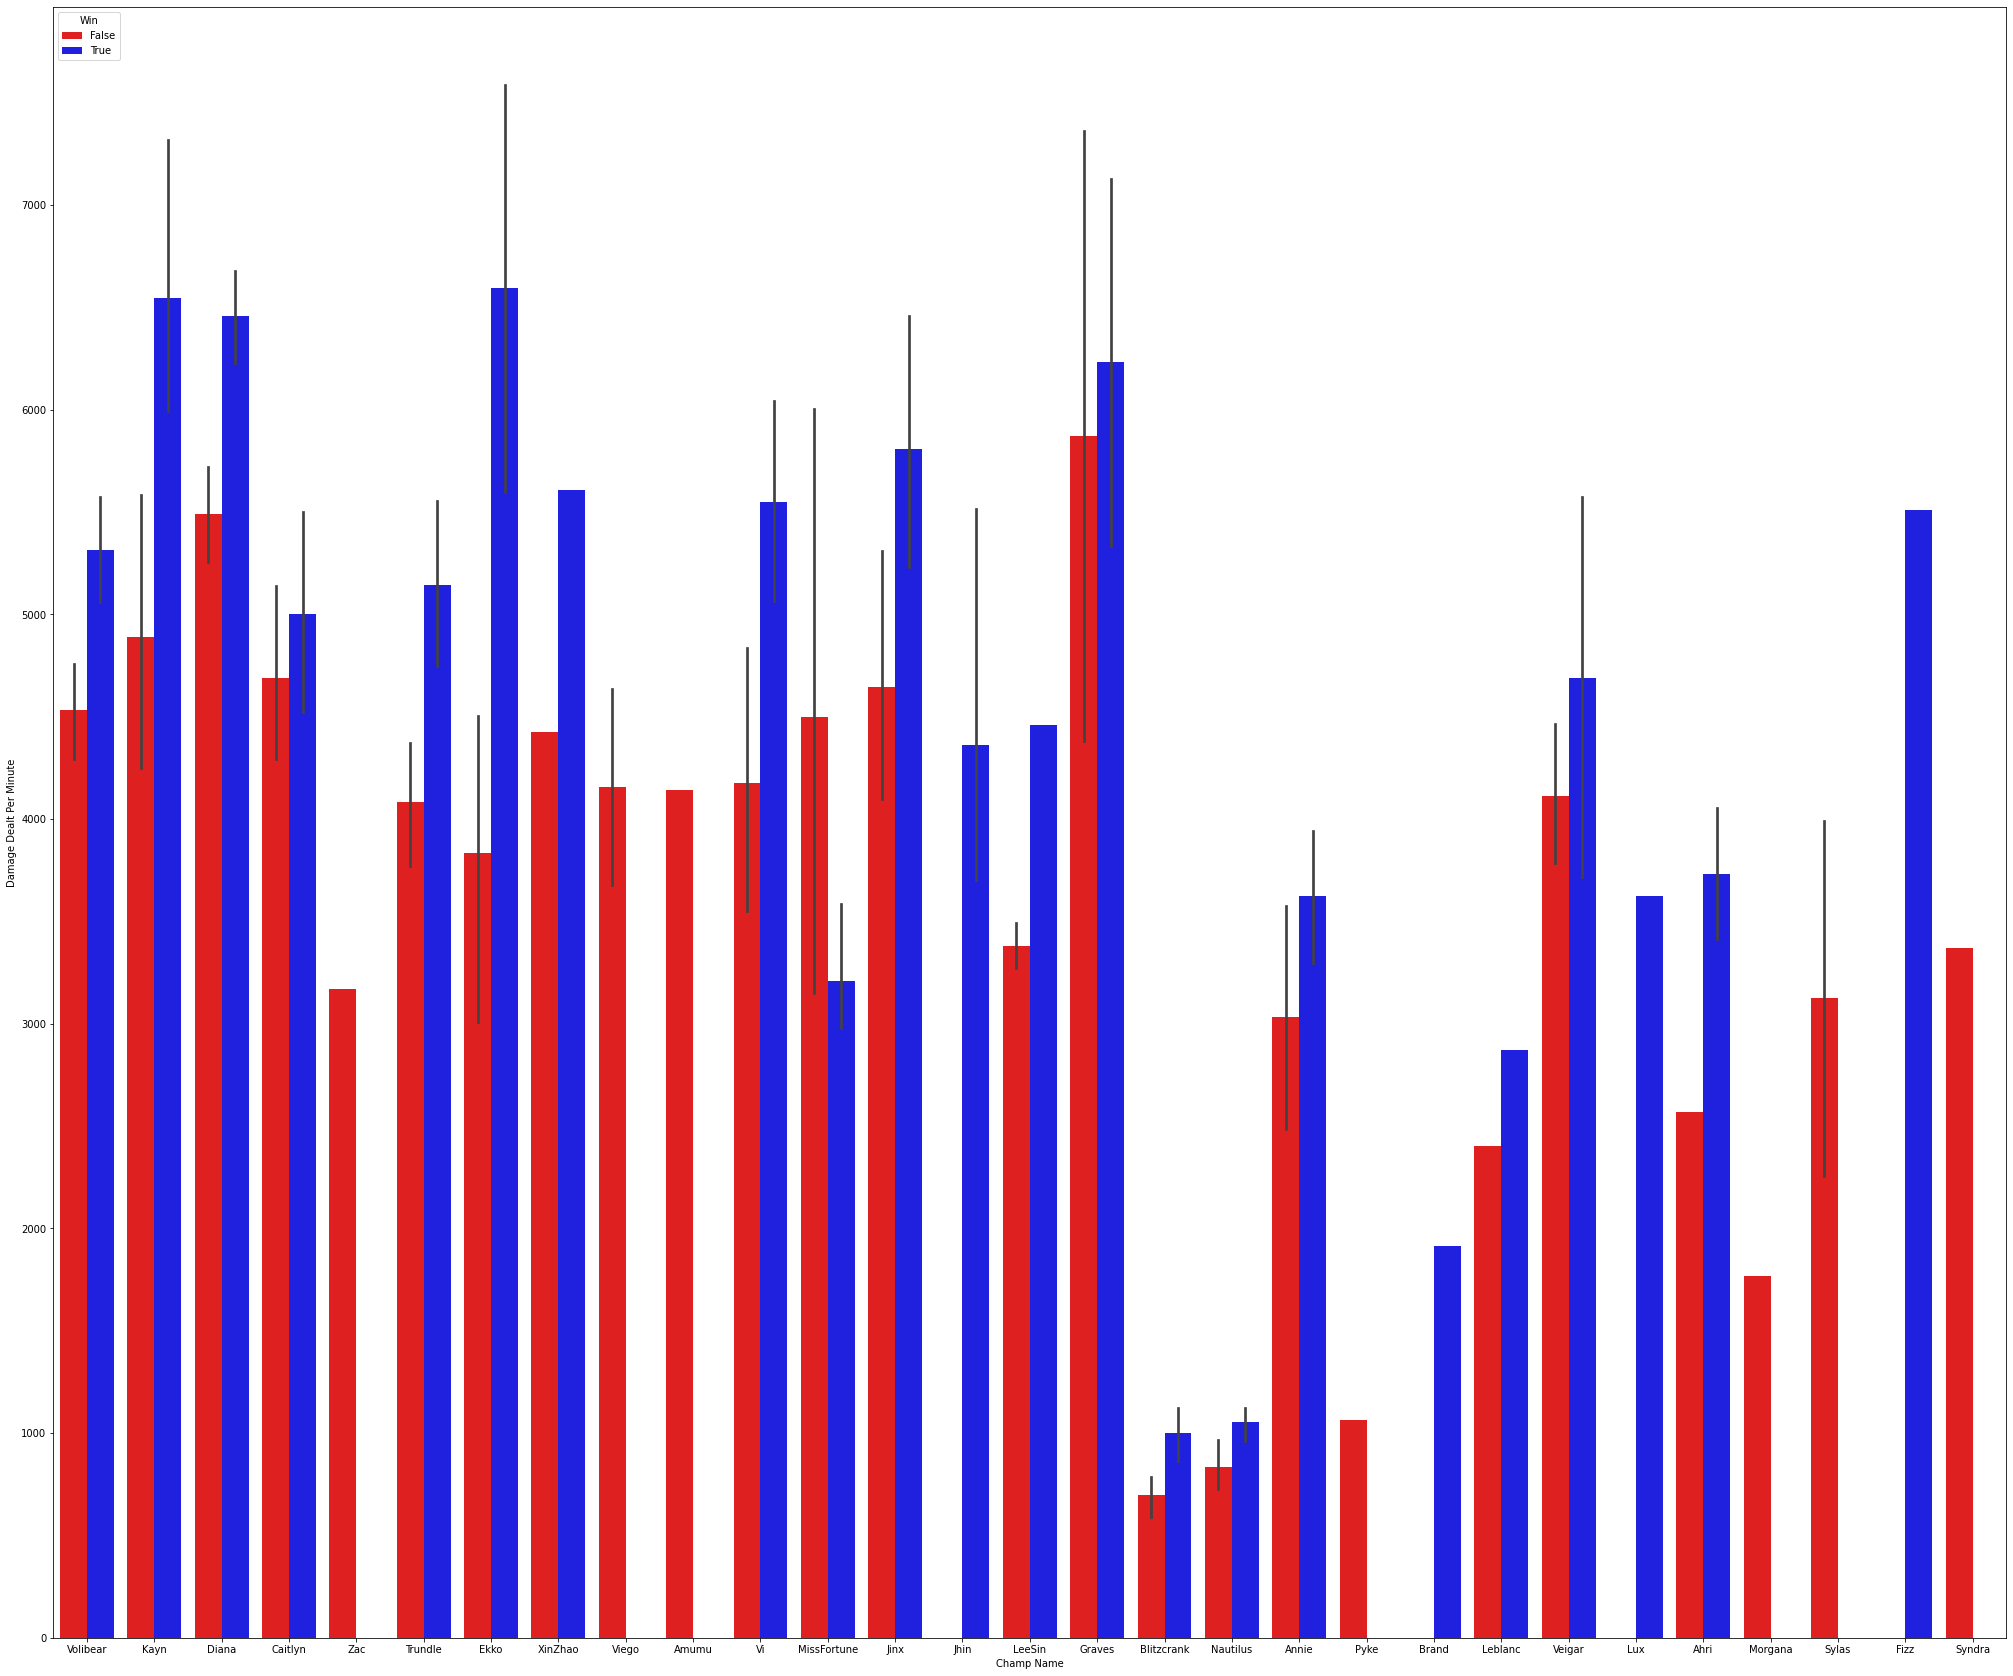

In [ ]:
fig_dims = (35, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df,x='Champ Name',y='Damage Dealt Per Minute',hue='Win',palette=('Red','Blue'),ax=ax)

**Comments:**

By plotting the different champions played and the *Average Damage Dealt Per Minute* by each, it was evident that jungle champions such as Volibear, Kayn, Diana, Ekko, etc. have more burst damage than a typical Bottom role champion such as Caitlyn, Jinx, Jhin, etc.  

**Damage Shielded Per Minute for Each Role**

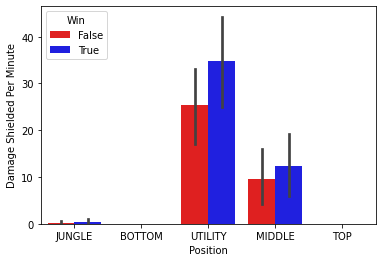

In [ ]:
sns.barplot(data=df,x='Position',y='Damage Shielded Per Minute',hue='Win',palette=('Red','Blue'))

**Comments:**

The Utility/Support role has the highest amount of *Damage Shielded Per Minute* for all games regardless of won or lost. Since many tank champions have been played for the Jungle role, it was expected to be higher than the amount shown in the graph above. This is most likely due to certain items that were purchased for these champions and their runes that deflect damage from teammates to themselves.  

**Skillshots Hit Per Minute for Each Role**

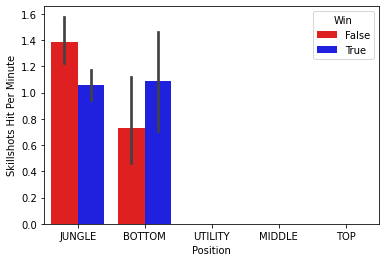

In [ ]:
sns.barplot(data=df,x='Position',y='Skillshots Hit Per Minute',hue='Win',palette=('Red','Blue'))

**Skillshots Dodged Per Minute for Each Role**

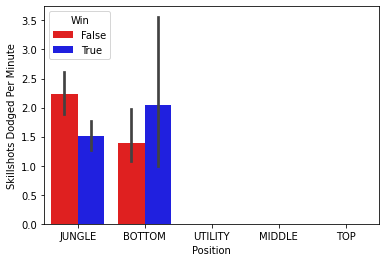

In [ ]:
sns.barplot(data=df,x='Position',y='Skillshots Dodged Per Minute',hue='Win',palette=('Red','Blue'))

**Comments:**

Both the graphs shown above had unexpected results. The more Skillshots Hit and Dodged Per Minute lead to a loss for the Jungle role. On the other hand, more Skillshots Hit and Dodged Per Minute lead to a win for the Bottom role. Since there were 252 null values for each of these features, innacurate conclusions might be derived from the graphs above due to the small sample size. Further information is needed to verify these results.   

**Countplot for Objectives Achieved** 

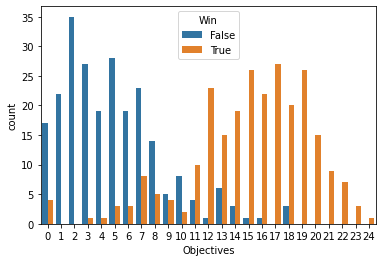

In [ ]:
df['Objectives'] = df['Dragon Kills'] + df['Herald Kills'] + df['Tower Kills'] + df['Inhib Kills'] + df['Baron Kills']
sns.countplot(data=df,x='Objectives',hue='Win')

**Comments:**

Another feature that was explored was the objectives achieved per game. The objectives include dragons, barons, heralds, towers, and inhibs. By achieving these objectives, the the team will gain added benefits in the form of physical abilities or gold. In the graph above, once a team starts to achieve more than 10 objectives, they have a significantly higher chance of winning the game. 

# Principal Component Analysis

A PCA was performed to reduce dimensionality and observe trends/patterns within the data set.  

In [ ]:
df_scale = df.drop(['Username','Champ Name','Position','Win',
    'Jungle CS Under 10 Min','Lane Minions Under 10 Min','Skillshots Dodged',
    'Skillshots Hit','Solo Kills','Skillshots Dodged Per Minute','Skillshots Hit Per Minute',
    'Kills','Deaths','Assists','Neutral Minions Killed','Game Length','Gold Earned',
    'Vision Score','Damage Dealt','Total Minions Killed','Damage Taken','Damage Shielded','Team Kills'],axis=1)


**Comments:**

1. Since PCA does not work well with string data types, the following features were dropped:
  * *Username*, *Champ Name*, and *Position*


2. Since PCA does not work well with null data types, the following features were dropped:
  * *Jungle CS Under 10 Min*, *Skillshots Dodged Per Minute*, *Skillshots Hit Per Min*, *Solo Kills*, and *Lane Minions Under 10 Min* 

  Each of the features mentioned above contained 252 null values each, which is more than half the given data for each feature (total of 500 values for each). Therefore, an insufficient amount of data was collected for those features, so they were dropped from the data frame. 

3. The features that were normalized were also dropped:
  * *Kills*, *Deaths*, *Assists*, *Neutral Minions Killed*, *Game Length*, *Gold Earned*, *Vision Score*, *Damage Dealt*, *Total Minions Killed*, *Damage Taken*, and *Damage Shielded*, *Team Kills* 

4. The response variable was dropped:
  * *Win*

**Scree Plot**

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [23] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


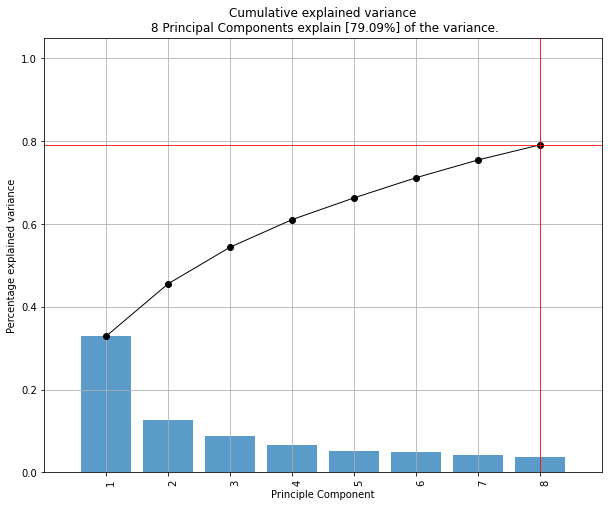

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa206912850>)

<Figure size 432x288 with 0 Axes>

In [ ]:
pca_model = pca(n_components=8,normalize=True)
results = pca_model.fit_transform(df_scale)
pca_model.plot(figsize=(10,8))

**Comments:**

As shown in the scree plot above, it is evident that 8 principle components explain approximately 80% of the variance for the data. 



**3D Visualization of PC1, PC2, and PC3**

In [ ]:
scores = pd.concat([results['PC'],df[['Win']]],axis=1)
figure=px.scatter_3d(scores[['PC1','PC2','PC3','Win']],x='PC1',y='PC2',z='PC3',color='Win',opacity=0.5)
figure.update_layout(margin=dict(l=0,r=0,b=0,t=0))
figure.show()

**3D Visualization of Loadings Plot**

In [ ]:
df_loadings = pd.DataFrame.transpose(results['loadings'])
fig=px.scatter_3d(df_loadings[['PC1','PC2','PC3']],x='PC1',y='PC2',z='PC3',text=df_loadings.index)
fig.show()

**Comments:**

By orienting both the 3D loadings plot and 3D scatter plot in the same principal directions, features such as *Team Kills*, *Baron Kills*, and *Dragon Kills* are located in the same region as the majority of the games won. Therefore, it can be concluded these are some of the important factors that determine if a game is won. 

# Model Preparation

**Selecting Features for the Model**

In [ ]:
df_model = df.drop(['Username','Jungle CS Under 10 Min','Lane Minions Under 10 Min','Skillshots Dodged',
    'Skillshots Hit','Solo Kills','Team Kills','Skillshots Dodged Per Minute','Skillshots Hit Per Minute',
    'Kills','Deaths','Assists','Neutral Minions Killed','Game Length','Gold Earned',
    'Vision Score','Damage Dealt','Total Minions Killed','Damage Taken','Damage Shielded'],axis=1)

**Dummy Variables and Train/Test Split Data**

In [ ]:
df_dum = pd.get_dummies(df_model)
X = df_dum.drop(['Win'],axis=1)
y = df_dum.Win
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Comments:**

The data frame for the model was split up into both *X* and *y*, where *X* contains all the relevant features and *y* contains the response variable. Afterwards, the data was split 80% for the train set and 20% for the test set.   

# Model Building

**Model Baseline**

In [ ]:
# Naive Bayes
gnb = GaussianNB()
score1 = cross_val_score(gnb,X_train,y_train,cv=5)

# Support Vector Classification
svc = SVC(probability=True)
score2 = cross_val_score(svc,X_train,y_train,cv=5)

# Random Forest 
rf = RandomForestClassifier(random_state=1)
score3 = cross_val_score(rf,X_train,y_train,cv=5)

# Logistic Regression
lr = LogisticRegression(max_iter=2000)
score4 = cross_val_score(rf,X_train,y_train,cv=5)

# Decision Tree
dt = tree.DecisionTreeClassifier(random_state=1)
score5 = cross_val_score(dt,X_train,y_train,cv=5)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
score6 = cross_val_score(knn,X_train,y_train,cv=5)

# XG Boost
xgb = XGBClassifier(random_state=1)
score7 = cross_val_score(xgb,X_train,y_train,cv=5)

score_list = []
score_list.append([score1.mean(),score2.mean(),score3.mean(),score4.mean(),score5.mean(),score6.mean(),score7.mean()])
df_scores = pd.DataFrame(score_list,columns=['gnb','svc','rf','lr','dt','knn','xgb'])
df_scores

,gnb,svc,rf,lr,dt,knn,xgb
0,0.869783,0.655794,0.92087,0.92087,0.897988,0.655599,0.941253


# Model Tuning

The three models that were decided to be tuned were Random Forest, Logistic Regression, and XG Boost since they performed the best in respect to the baseline scores. 

**Logistic Regression**

In [ ]:
param_grid_lr = {'max_iter':[2000],
                 'penalty':['l1','l2'],
                 'C':np.logspace(-4,4,20),
                 'solver':['liblinear']}
clf_lr = GridSearchCV(lr,param_grid=param_grid_lr,cv=5,verbose=True,n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train,y_train)
print('Best Score:' + str(best_clf_lr.best_score_))
print('Best Parameters:' + str(best_clf_lr.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Score:0.9386562804284322
Best Parameters:{'C': 0.615848211066026, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


**Random Forest**

In [ ]:
param_grid_rf = {'n_estimators':[100,500,1000],
                 'bootstrap':[True,False],
                 'max_depth':[3,5,10,20,50,75,100],
                 'max_features':['auto','sqrt'],
                 'min_samples_leaf':[1,2,4,10],
                 'min_samples_split':[2,5,10]}
clf_rf = RandomizedSearchCV(rf,param_distributions=param_grid_rf,n_iter=100,cv=5,verbose=True,n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train,y_train)
print('Best Score:' + str(best_clf_rf.best_score_))
print('Best Parameters:' + str(best_clf_rf.best_params_))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:0.9259980525803311
Best Parameters:{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


**Comments:**

A randomized search for the hyperparameters was used instead of grid search due to the long runtime.  

**RF Feature Plotting**

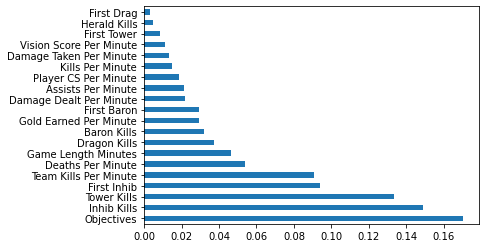

In [ ]:
best_rf = best_clf_rf.best_estimator_.fit(X_train,y_train)
feat_importances = pd.Series(best_rf.feature_importances_,index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

**Comments:**

In the plot above, the most important features that influenced the Random Forest model are listed. Overall, it was expected to see objective items such as *Inhib Kills*, *Tower Kills*, *Dragon Kills*, *Baron Kills*, etc at the top of the list. On the other hand, it was not expected to see *Deaths Per Minute*, *Team Kills Per Minute*, and *Game Length Minutes* as highly ranked compared to other objective items.  

**XG Boost** 

In [ ]:
param_grid_xgb = {'n_estimators': [20, 50, 100, 250, 500,1000],
                  'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
                  'max_depth': [2, 5, 10, 15, 20, 25],
                  'reg_alpha': [0, 0.5, 1],
                  'reg_lambda': [1, 1.5, 2],
                  'subsample': [0.3,0.5,0.7,0.9],
                  'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
                  'gamma':[0,.01,.1,1,10,100],
                  'min_child_weight':[0,.01,0.1,1,10,100],
                  'sampling_method': ['uniform', 'gradient_based']}
clf_xgb = RandomizedSearchCV(xgb, param_distributions = param_grid_xgb,n_iter=100,cv=5,verbose=True,n_jobs=-1,error_score='raise')
best_clf_xgb = clf_xgb.fit(X_train,y_train)
print('Best Score:' + str(best_clf_xgb.best_score_))
print('Best Parameters:' + str(best_clf_xgb.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:0.9514118792599806
Best Parameters:{'subsample': 0.5, 'sampling_method': 'uniform', 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 0.01, 'max_depth': 20, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.2}


# Final Results

In [ ]:
df_scores.loc[len(df_scores.index)] = ['NA','NA',best_clf_rf.best_score_,best_clf_lr.best_score_,'NA','NA',best_clf_xgb.best_score_]
df_scores

,gnb,svc,rf,lr,dt,knn,xgb
0,0.869783,0.655794,0.920870,0.920870,0.897988,0.655599,0.941253
1,NA,NA,0.925998,0.938656,NA,NA,0.951412


Highest Performance --> XGB with a score of 95.14%

# Key Takeaways 

**My initial hypothesis was proven to be correct** that objectives determine the outcome of the game. This conclusion can be supported by the Random Forest Feature Plot and the PCA Plots.  

The questions asked in the beginning of the project are answered below:

1. **Do objectives achieved early in the game have a substantial effect on the outcome?**

    The objectives achieved early in the game have an effect on the outcome of the game, but not as substantial as late game objectives. For example, features such as *First Baron* and *First Inhib* have more of an impact than *First Drag* and *First Blood*. 

2. **Does late game performance matter more than early game performance?**

    Based on the Countplots for Categorical Features, Game Length vs. Dragons Killed, and Game Length vs. Barons Killed, it is evident that objectives acquired later in a game result in a victory. 

3. **What factors other than objectives contribute to the outcome of a game?**

    Even though *Objectives* was the most important factor, some other features that were highly ranked were *Team Kills Per Minute*, *Deaths Per Minute*, and *Game Length Minutes*.

4. **Should I change roles or play new champions?**

    Since the responsibilities of the Jungle role is to help other lanes and secure objectives, it is one of the most influential roles in the game. Due to the fact that acquiring more objectives result in victories, I should continue playing the Jungle role.  

5. **As a Jungle main, are there certain aspects of my gameplay I should focus on?**

    As a Jungler, I should focus on making sure my team gets the most amount of objectives. Additional focuses should be 1) helping other teammates get ahead in their lanes, which will increase the *Team Kills Per Minute*, and 2) minimizing my *Deaths Per Minute*.  